# 3.0: PART A : Shortlist Promising Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno 
import warnings
import sklearn

In [2]:
file_path = '../data/processed/processed_waterPollution.csv'

df_eda = pd.read_csv(file_path)

In [3]:
pd.set_option('display.max_columns', None)
df_eda.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,waterBodyIdentifier,Country,TerraMarineProtected_2016_2018,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,resultMeanValue_log1p,combustibleRenewables_2009_2014_log1p,PopulationDensity_log1p,gdp_log1p,TouristMean_1990_2020_log1p,VenueCount_log1p,netMigration_2011_2018_logmod,droughts_floods_temperature_yj,Start_Year,End_Year,Sampling_Duration_In_Year,resultUom_Desc
0,RW,CAS_14797-65-0,total,water,FRDR609,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.061387,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
1,RW,CAS_14797-65-0,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.045674,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
2,RW,EEA_3164-07-6,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,4.896787,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Mass Ratio
3,RW,CAS_14797-55-8,total,water,FRFR327C,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,2.531979,1.697053,4.814616,28.662794,18.080671,1.098612,11.235977,-0.632029,2009,2009,1,Nitrate (mg/L)
4,RW,EEA_3151-01-7,total,water,ES014MSPFES-014-NR-038-000-02-02,Spain,15.047884,49.0,8.0,3.0,14.0,15.0,9.0,2.0,0.0,16.84,0.187972,1.679577,4.550473,28.012541,17.746192,1.609438,-10.598040,2.105301,2009,2009,1,Millimoles per Liter


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# --- Define the selected feature list ---
selected_clustering_features = [
    'composition_food_organic_waste_percent',
    'composition_glass_percent',
    'composition_paper_cardboard_percent',
    'composition_plastic_percent',
    'combustibleRenewables_2009_2014_log1p',
    'composition_yard_garden_green_waste_percent',
    'resultMeanValue_log1p',
    'PopulationDensity_log1p',
    'TerraMarineProtected_2016_2018',
    'netMigration_2011_2018_logmod',
    'Start_Year'
]

print("--- Starting Workflow selected clustering features ---")

--- Starting Workflow selected clustering features ---


In [6]:
# --- Step 1: Feature Selection ---
print(f"\n--- Step 1: Selecting {len(selected_clustering_features)} features for selected features")

existing_features = [col for col in selected_clustering_features if col in df_eda.columns]

if len(existing_features) != len(selected_clustering_features):
    missing = set(selected_clustering_features) - set(existing_features)
    print(f"Warning: The following requested features were NOT found in df_eda: {list(missing)}")
    if not existing_features:
        raise ValueError("Error: None of the requested features for Subset 2 were found in df_eda. Please check column names.")

print(f"Using features: {existing_features}")

# Create the DataFrame for this subset
df_numerical = df_eda[existing_features].copy()

print(f"\nShape of selected data (df_numerical): {df_numerical.shape}")
print("First 5 rows of selected data:")
print(df_numerical.head())


--- Step 1: Selecting 11 features for selected features
Using features: ['composition_food_organic_waste_percent', 'composition_glass_percent', 'composition_paper_cardboard_percent', 'composition_plastic_percent', 'combustibleRenewables_2009_2014_log1p', 'composition_yard_garden_green_waste_percent', 'resultMeanValue_log1p', 'PopulationDensity_log1p', 'TerraMarineProtected_2016_2018', 'netMigration_2011_2018_logmod', 'Start_Year']

Shape of selected data (df_numerical): (18135, 11)
First 5 rows of selected data:
   composition_food_organic_waste_percent  composition_glass_percent  \
0                                    32.0                       10.0   
1                                    32.0                       10.0   
2                                    32.0                       10.0   
3                                    32.0                       10.0   
4                                    49.0                        8.0   

   composition_paper_cardboard_percent  composit

In [7]:
# --- Step 2: Handle Missing Values (Imputation) ---
print("\n--- Step 2: Handling Missing Values (Imputation) ---")
print("Checking for missing values before imputation:")
print(df_numerical.isnull().sum())

if df_numerical.isnull().sum().any():
    print("\nImputing missing values using median...")
    imputer = SimpleImputer(strategy='median')
    df_imputed_np = imputer.fit_transform(df_numerical)
    # Convert back to DataFrame
    df_imputed = pd.DataFrame(df_imputed_np,
                                      columns=df_numerical.columns,
                                      index=df_numerical.index)
    print("\nMissing values after imputation:")
    print(df_imputed.isnull().sum()) # Should all be 0
else:
    print("\nNo missing values found in the selected features.")
    df_imputed = df_numerical.copy() # Use original if no NaNs


--- Step 2: Handling Missing Values (Imputation) ---
Checking for missing values before imputation:
composition_food_organic_waste_percent         0
composition_glass_percent                      0
composition_paper_cardboard_percent            0
composition_plastic_percent                    0
combustibleRenewables_2009_2014_log1p          0
composition_yard_garden_green_waste_percent    0
resultMeanValue_log1p                          0
PopulationDensity_log1p                        0
TerraMarineProtected_2016_2018                 0
netMigration_2011_2018_logmod                  0
Start_Year                                     0
dtype: int64

No missing values found in the selected features.


In [8]:
# --- Step 3: Scale the Data ---
print("\n--- Step 3: Scaling the Imputed Data ---")
scaler = StandardScaler()
# Scale the imputed data
df_scaled_np = scaler.fit_transform(df_imputed)
# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled_np,
                                 columns=df_imputed.columns,
                                 index=df_imputed.index)

print("\nScaled data (first 5 rows):")
print(df_scaled.head())
print(f"Shape of scaled data: {df_scaled.shape}")


--- Step 3: Scaling the Imputed Data ---

Scaled data (first 5 rows):
   composition_food_organic_waste_percent  composition_glass_percent  \
0                                0.056364                   0.702323   
1                                0.056364                   0.702323   
2                                0.056364                   0.702323   
3                                0.056364                   0.702323   
4                                1.684611                   0.070555   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                             0.480806                    -0.586279   
1                             0.480806                    -0.586279   
2                             0.480806                    -0.586279   
3                             0.480806                    -0.586279   
4                            -1.759745                    -0.586279   

   combustibleRenewables_2009_2014_log1p  \
0                        

In [9]:
# --- Step 4: Perform PCA (2D and 3D) ---
print("\n--- Step 4: Performing PCA ---")

# 4a: PCA with 2 Components
print("\n--- Performing PCA with 2 Components ---")
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled) # Use scaled data

print("Explained Variance Ratio (2 Components):", pca_2d.explained_variance_ratio_)
print("Cumulative Explained Variance (2 Components):", pca_2d.explained_variance_ratio_.cumsum()[-1])



--- Step 4: Performing PCA ---

--- Performing PCA with 2 Components ---
Explained Variance Ratio (2 Components): [0.52340371 0.26884988]
Cumulative Explained Variance (2 Components): 0.7922535901655801


In [10]:
# 4b: PCA with 3 Components
print("\n--- Performing PCA with 3 Components ---")
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled) # Use SAME scaled data

print("Explained Variance Ratio (3 Components):", pca_3d.explained_variance_ratio_)
print("Cumulative Explained Variance (3 Components):", pca_3d.explained_variance_ratio_.cumsum()[-1])



--- Performing PCA with 3 Components ---
Explained Variance Ratio (3 Components): [0.52340371 0.26884988 0.08993837]
Cumulative Explained Variance (3 Components): 0.8821919628327984



--- Step 5: Visualizing PCA Results ---


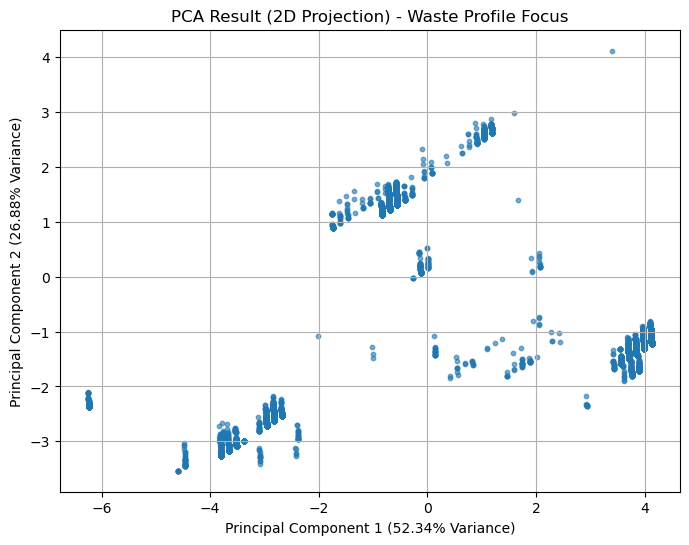

In [11]:
# --- Step 5: Visualize PCA Results ---
print("\n--- Step 5: Visualizing PCA Results ---")

# 5a: Visualize 2D PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.6, s=10) # Smaller points often better
plt.xlabel(f"Principal Component 1 ({pca_2d.explained_variance_ratio_[0]:.2%} Variance)")
plt.ylabel(f"Principal Component 2 ({pca_2d.explained_variance_ratio_[1]:.2%} Variance)")
plt.title("PCA Result (2D Projection) - Waste Profile Focus")
plt.grid(True)
plt.show()


Visualizing 3D PCA results...


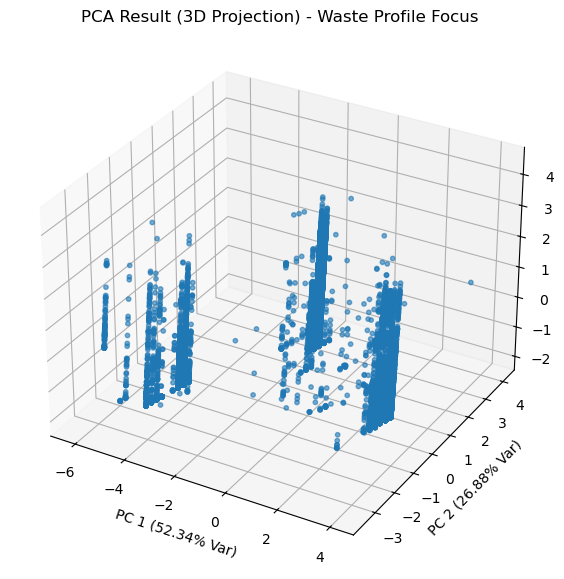


--- Steps 1-5 Completed ---


In [12]:
# 5b: Visualize 3D PCA Results
print("\nVisualizing 3D PCA results...")
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0],  # PC1 on x-axis
           df_pca_3d[:, 1],  # PC2 on y-axis
           df_pca_3d[:, 2],  # PC3 on z-axis
           alpha=0.6, s=10) # Smaller points often better

ax.set_xlabel(f"PC 1 ({pca_3d.explained_variance_ratio_[0]:.2%} Var)")
ax.set_ylabel(f"PC 2 ({pca_3d.explained_variance_ratio_[1]:.2%} Var)")
ax.set_zlabel(f"PC 3 ({pca_3d.explained_variance_ratio_[2]:.2%} Var)")
plt.title("PCA Result (3D Projection) - Waste Profile Focus")
plt.show()

print("\n--- Steps 1-5 Completed ---")

## Defining functions

this is to automate the calculation of **Silhouette Score**, **Davies-Bouldin Index** and **Calinsky-Harabasz Index** to ensure consistency in evaluating across models

In [13]:
# Import necessary libraries for clustering and evaluation
import numpy as np
import pandas as pd # Assuming df_scaled comes from a pandas DataFrame initially
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns # For potentially better visualizations
from sklearn.cluster import (
    KMeans,
    MeanShift,
    estimate_bandwidth,
    AgglomerativeClustering,
    Birch,
    DBSCAN
)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.preprocessing import StandardScaler # Keep handy if needed later
from sklearn.decomposition import PCA # Already imported, but good practice
import warnings
try:
    import hdbscan
except ImportError:
    print("HDBSCAN library not found. Please install it using: pip install hdbscan")
    pass



#### 1. Evaluation Function

this function automates the calculation of key clustering metrics

In [14]:
print("\n--- Starting Part A: Identifying and Selecting Promising Models ---")

print("\n--- Step 6: Defining Evaluation Function ---")

def evaluate_clustering(X, labels, algorithm_name, data_dimensionality):
    """
    Calculates and prints key clustering evaluation metrics.

    Args:
        X (np.ndarray): The data used for clustering (e.g., PCA results).
        labels (np.ndarray): The cluster labels assigned by the algorithm.
        algorithm_name (str): Name of the clustering algorithm used.
        data_dimensionality (str): Description of the data (e.g., '2D PCA', '3D PCA').

    Returns:
        dict: A dictionary containing the calculated scores. Returns None if metrics
              cannot be calculated (e.g., < 2 clusters or noise points only).
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1]) # Exclude noise label (-1) if present

    print(f"\n--- Evaluation for {algorithm_name} on {data_dimensionality} Data ---")
    print(f"Number of clusters found: {n_clusters}")
    if -1 in unique_labels:
        n_noise = np.sum(labels == -1)
        print(f"Number of noise points: {n_noise} ({(n_noise / len(labels)):.2%})")

    results = {
        'Algorithm': algorithm_name,
        'Dimensionality': data_dimensionality,
        'Num_Clusters': n_clusters,
        'Silhouette': None,
        'Davies-Bouldin': None,
        'Calinski-Harabasz': None
    }

    if n_clusters >= 2:
        if -1 in unique_labels:
            mask = labels != -1
            X_filtered = X[mask]
            labels_filtered = labels[mask]
            # Ensure there are still enough points after filtering
            if len(np.unique(labels_filtered)) < 2 or X_filtered.shape[0] < 2:
                 print("Not enough clustered points to calculate metrics after removing noise.")
                 return results # Return results with None values for metrics
        else:
            X_filtered = X
            labels_filtered = labels

        # Ensure we still have enough points and clusters after filtering
        if len(np.unique(labels_filtered)) >= 2 and X_filtered.shape[0] >= 2:
            try:
                silhouette = silhouette_score(X_filtered, labels_filtered)
                davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)
                calinski_harabasz = calinski_harabasz_score(X_filtered, labels_filtered)

                results['Silhouette'] = silhouette
                results['Davies-Bouldin'] = davies_bouldin
                results['Calinski-Harabasz'] = calinski_harabasz

                print(f"Silhouette Score: {silhouette:.4f} (Higher is better, range [-1, 1])")
                print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better, >= 0)")
                print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")
            except Exception as e:
                 print(f"Could not calculate metrics: {e}")
                 # Store None in results if calculation fails
        else:
             print("Not enough clusters or data points remaining after filtering noise to calculate metrics.")

    else:
        print("Cannot calculate metrics: Need at least 2 clusters.")

    return results


--- Starting Part A: Identifying and Selecting Promising Models ---

--- Step 6: Defining Evaluation Function ---


#### 2. Visualization Function

- **plot_clusters_2d()** is to visualise clusters in 2 Dimension using pca 1 and pca 2
- **plot_clusters_3d()** is to visualise clusters in 3 Dimension using pca 1, pca 2 and pca 3
- Noise will be in the colour **grey** (for models that captures it)


In [15]:
print("\n--- Step 7: Defining Visualization Functions ---")

def plot_clusters_2d(X, labels, pca_obj, algorithm_name, title_suffix=""):
    """Plots 2D clustering results."""
    unique_labels = sorted(np.unique(labels))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels))) # Use viridis colormap

    plt.figure(figsize=(10, 7))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Plot noise points distinctly (grey and smaller)
            col = [0.5, 0.5, 0.5, 0.6] # Grey color with some transparency
            markersize = 4
            label = 'Noise'
        else:
            markersize = 6
            label = f'Cluster {k}'

        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=markersize, label=label, alpha=0.7)

    plt.xlabel(f"Principal Component 1 ({pca_obj.explained_variance_ratio_[0]:.2%} Variance)")
    plt.ylabel(f"Principal Component 2 ({pca_obj.explained_variance_ratio_[1]:.2%} Variance)")
    plt.title(f'Clustering Result ({algorithm_name} on 2D PCA){title_suffix}')
    if len(unique_labels) < 15: # Avoid overly cluttered legends
        plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_clusters_3d(X, labels, pca_obj, algorithm_name, title_suffix=""):
    """Plots 3D clustering results."""
    unique_labels = sorted(np.unique(labels))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels))) # Consistent colormap

    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111, projection='3d')

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0.5, 0.5, 0.5, 0.6] # Grey for noise
            markersize = 10 # Adjust size for 3D visibility
            label = 'Noise'
            alpha = 0.5
        else:
            markersize = 15 # Adjust size for 3D visibility
            label = f'Cluster {k}'
            alpha = 0.7

        class_member_mask = (labels == k)
        xyz = X[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=markersize, c=[col[:3]], label=label, alpha=alpha, edgecolor='k', linewidth=0.5) # Use only RGB for 'c'

    ax.set_xlabel(f"PC 1 ({pca_obj.explained_variance_ratio_[0]:.2%} Var)")
    ax.set_ylabel(f"PC 2 ({pca_obj.explained_variance_ratio_[1]:.2%} Var)")
    ax.set_zlabel(f"PC 3 ({pca_obj.explained_variance_ratio_[2]:.2%} Var)")
    ax.set_title(f'Clustering Result ({algorithm_name} on 3D PCA){title_suffix}')

    # Improve layout and viewpoint
    plt.tight_layout()
    ax.view_init(elev=20., azim=-65) # Adjust viewing angle if necessary

    if len(unique_labels) < 15:
        ax.legend(loc='best')
    plt.show()



--- Step 7: Defining Visualization Functions ---


### 3. Function to run and evaluate Clustering algorithm

In [16]:
# --- Step 8: Apply and Evaluate Clustering Algorithms ---
print("\n--- Step 8: Applying and Evaluating Clustering Algorithms ---")

# Store results for comparison later
all_results = []

# Function to apply, evaluate, and plot for a given algorithm and data
def run_clustering_analysis(algorithm, name, X_2d, X_3d, pca_2d_obj, pca_3d_obj, **kwargs):
    """Fits algorithm, evaluates, plots, and stores results for 2D and 3D PCA data."""
    print(f"\n{'='*15} Analyzing {name} {'='*15}")

    # --- Analysis on 2D PCA Data ---
    print(f"\n--- {name} on 2D PCA Data ---")
    try:
        model_2d = algorithm(**kwargs) # Instantiate model with specific params
        # Special handling for models that don't have a predict method (like Agglomerative)
        if hasattr(model_2d, 'fit_predict'):
            labels_2d = model_2d.fit_predict(X_2d)
        elif hasattr(model_2d, 'fit') and hasattr(model_2d, 'labels_'):
             model_2d.fit(X_2d)
             labels_2d = model_2d.labels_
        else:
            print(f"Model {name} fitting/label extraction needs specific handling.")
            labels_2d = None # Skip if unsure how to get labels

        if labels_2d is not None:
            results_2d = evaluate_clustering(X_2d, labels_2d, name, '2D PCA')
            if results_2d: all_results.append(results_2d)
            plot_clusters_2d(X_2d, labels_2d, pca_2d_obj, name)
        else:
            print("Skipping 2D evaluation and plotting due to label extraction issue.")

    except Exception as e:
        print(f"Error running {name} on 2D data: {e}")

    # --- Analysis on 3D PCA Data ---
    print(f"\n--- {name} on 3D PCA Data ---")
    try:
    
        model_3d = algorithm(**kwargs)
        if hasattr(model_3d, 'fit_predict'):
            labels_3d = model_3d.fit_predict(X_3d)
        elif hasattr(model_3d, 'fit') and hasattr(model_3d, 'labels_'):
             model_3d.fit(X_3d)
             labels_3d = model_3d.labels_
        else:
            print(f"Model {name} fitting/label extraction needs specific handling.")
            labels_3d = None # Skip if unsure how to get labels

        if labels_3d is not None:
            results_3d = evaluate_clustering(X_3d, labels_3d, name, '3D PCA')
            if results_3d: all_results.append(results_3d)
            plot_clusters_3d(X_3d, labels_3d, pca_3d_obj, name)
        else:
            print("Skipping 3D evaluation and plotting due to label extraction issue.")

    except Exception as e:
        print(f"Error running {name} on 3D data: {e}")


--- Step 8: Applying and Evaluating Clustering Algorithms ---


# Experimenting Models
1. K-Means


--- Determining Optimal K for K-Means ---


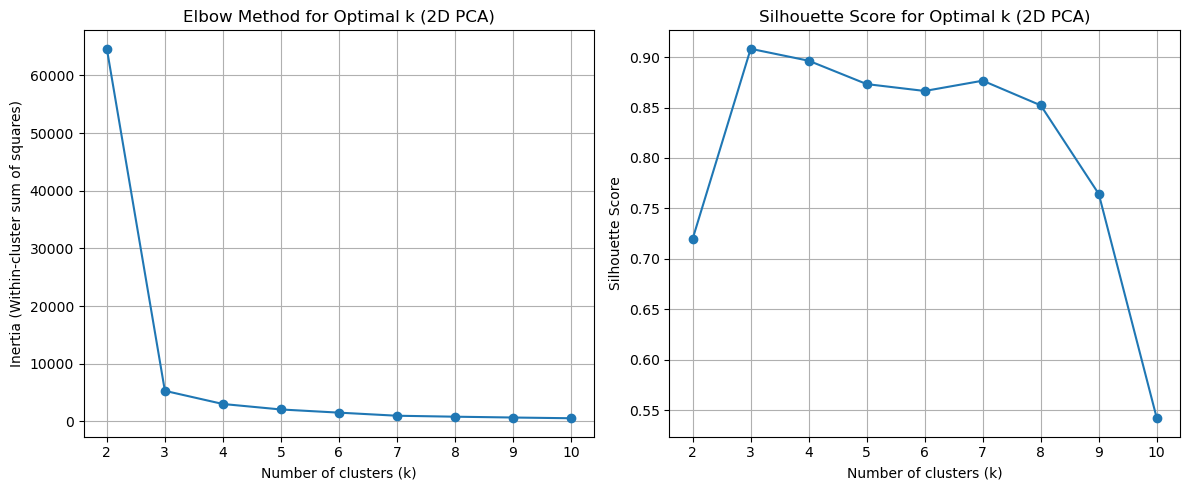

In [17]:
# --- 8.1: K-Means ---
# Determine optimal K using Elbow Method and Silhouette Scores
print("\n--- Determining Optimal K for K-Means ---")
k_range = range(2, 11) # Sensible range to test for K
inertia = []
silhouette_scores_kmeans = []

# Check on 2D data first (often sufficient for K selection)
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init suppresses warning
    labels_test = kmeans_test.fit_predict(df_pca_2d)
    inertia.append(kmeans_test.inertia_)
    if len(np.unique(labels_test)) > 1: # Check if >1 cluster formed
        silhouette_scores_kmeans.append(silhouette_score(df_pca_2d, labels_test))
    else:
        silhouette_scores_kmeans.append(-1) # Assign invalid score

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k (2D PCA)')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (2D PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

There is a clear elbow on k=3 and highest point reached for silhouette score is k=3 so 3 is choosen as optimal k


Selected optimal k = 3 based on Elbow/Silhouette analysis (adjust if needed).

=============== Analyzing K-Means ===============

--- K-Means on 2D PCA Data ---

--- Evaluation for K-Means on 2D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.9083 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.1455 (Lower is better, >= 0)
Calinski-Harabasz Index: 261069.1251 (Higher is better)


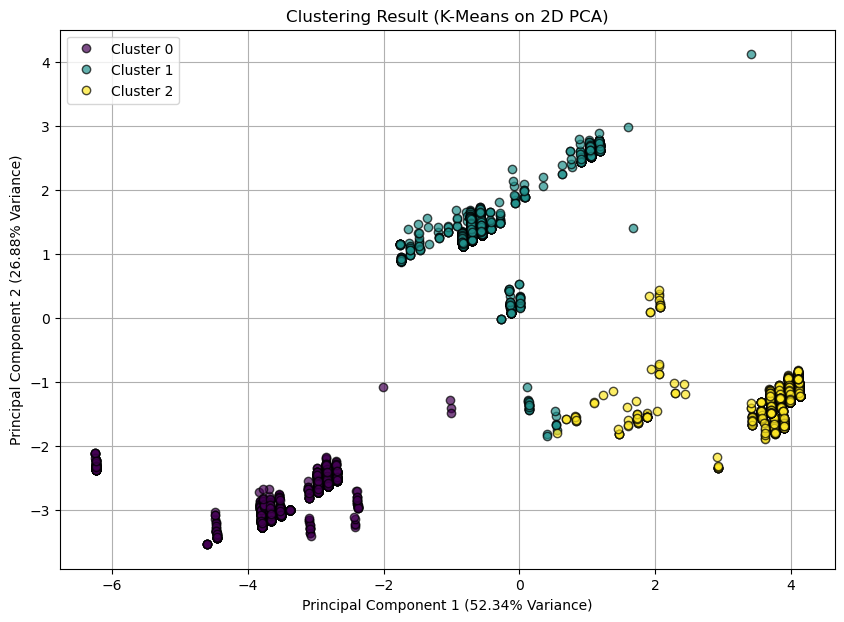


--- K-Means on 3D PCA Data ---

--- Evaluation for K-Means on 3D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.7479 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3855 (Lower is better, >= 0)
Calinski-Harabasz Index: 59743.4070 (Higher is better)


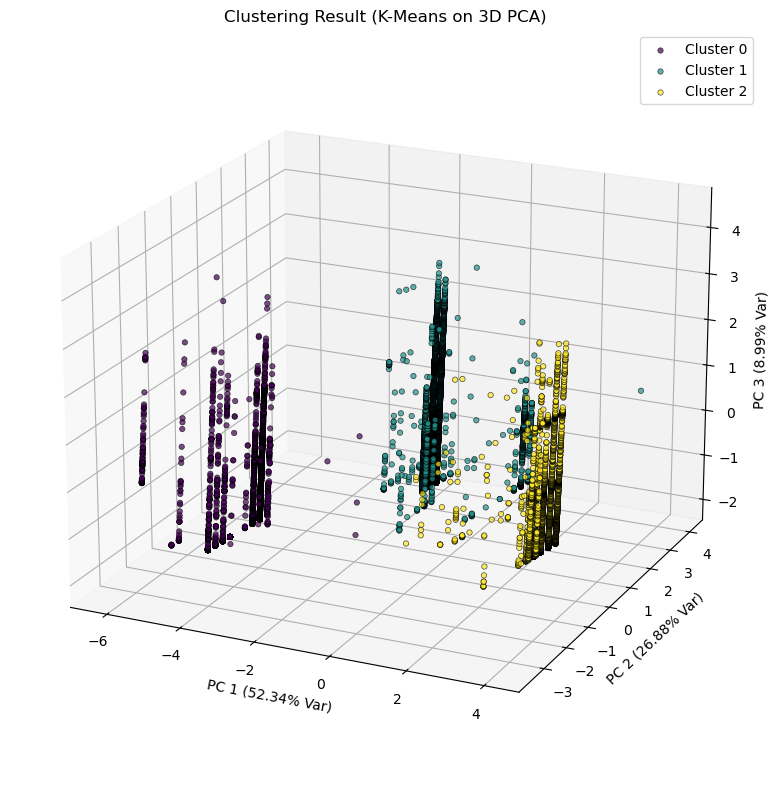

In [18]:
optimal_k = 3 
print(f"\nSelected optimal k = {optimal_k} based on Elbow/Silhouette analysis (adjust if needed).")

# Now run K-Means with the chosen k
run_clustering_analysis(
    KMeans,
    "K-Means",
    df_pca_2d,
    df_pca_3d,
    pca_2d, # Pass the fitted PCA object
    pca_3d,
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

2. Mean Shift


--- Estimating Bandwidth for Mean Shift (using 2D PCA data) ---
Estimated bandwidth for 2D data: 1.7249
Estimated bandwidth for 3D data: 2.1121

Running Mean Shift with estimated bandwidth...

=============== Analyzing MeanShift ===============

--- MeanShift on 2D PCA Data ---

--- Evaluation for Mean Shift on 2D PCA Data ---
Number of clusters found: 7
Silhouette Score: 0.8874 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3924 (Lower is better, >= 0)
Calinski-Harabasz Index: 280513.4801 (Higher is better)


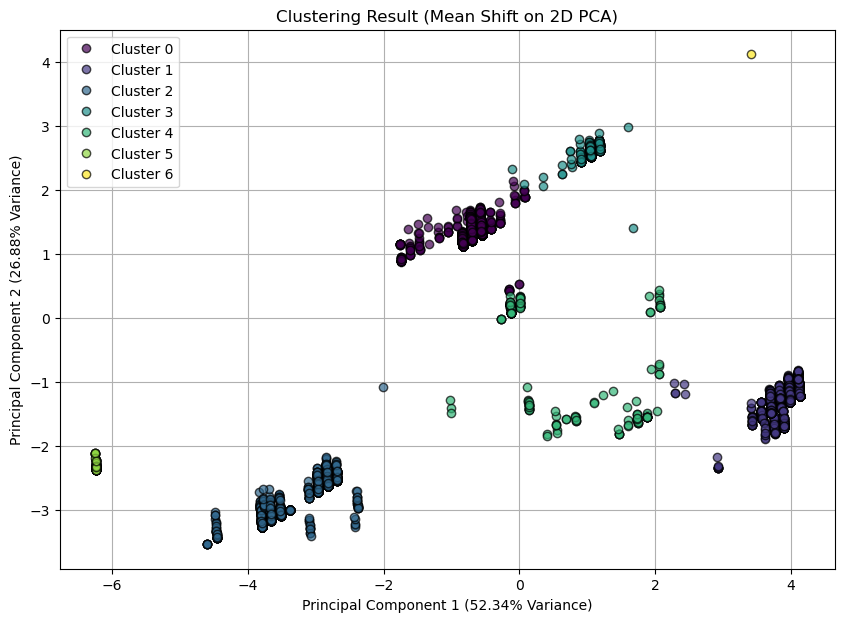


--- MeanShift on 3D PCA Data ---

--- Evaluation for Mean Shift on 3D PCA Data ---
Number of clusters found: 5
Silhouette Score: 0.5960 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.7619 (Lower is better, >= 0)
Calinski-Harabasz Index: 30748.2144 (Higher is better)


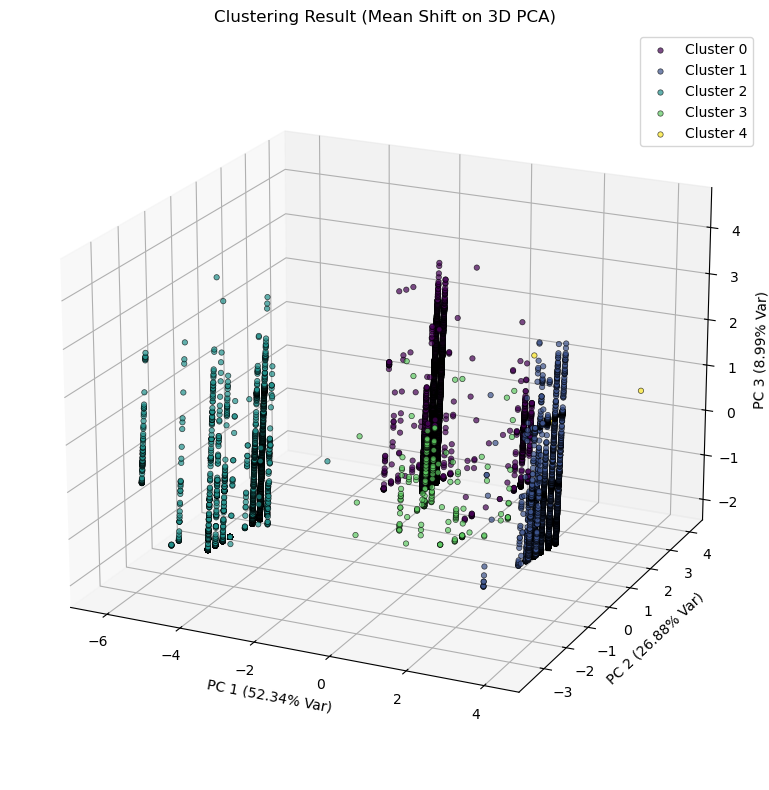

In [19]:
# --- 8.2: Mean Shift ---
print("\n--- Estimating Bandwidth for Mean Shift (using 2D PCA data) ---")
try:
    # Use only a subset for faster estimation if dataset is large
    subset_indices = np.random.choice(df_pca_2d.shape[0], min(1000, df_pca_2d.shape[0]), replace=False)
    bandwidth_2d = estimate_bandwidth(df_pca_2d[subset_indices], quantile=0.2, n_samples=min(500, len(subset_indices)))
    print(f"Estimated bandwidth for 2D data: {bandwidth_2d:.4f}")

    bandwidth_3d = estimate_bandwidth(df_pca_3d[subset_indices], quantile=0.2, n_samples=min(500, len(subset_indices)))
    print(f"Estimated bandwidth for 3D data: {bandwidth_3d:.4f}")


    # Run Mean Shift with estimated bandwidths
    print("\nRunning Mean Shift with estimated bandwidth...")
    # Need separate runs as bandwidth differs for 2D/3D
    print(f"\n{'='*15} Analyzing MeanShift {'='*15}")
    # 2D
    print("\n--- MeanShift on 2D PCA Data ---")
    ms_2d = MeanShift(bandwidth=bandwidth_2d, bin_seeding=True) # bin_seeding often speeds it up
    labels_ms_2d = ms_2d.fit_predict(df_pca_2d)
    results_ms_2d = evaluate_clustering(df_pca_2d, labels_ms_2d, "Mean Shift", '2D PCA')
    if results_ms_2d: all_results.append(results_ms_2d)
    plot_clusters_2d(df_pca_2d, labels_ms_2d, pca_2d, "Mean Shift")

    # 3D
    print("\n--- MeanShift on 3D PCA Data ---")
    ms_3d = MeanShift(bandwidth=bandwidth_3d, bin_seeding=True)
    labels_ms_3d = ms_3d.fit_predict(df_pca_3d)
    results_ms_3d = evaluate_clustering(df_pca_3d, labels_ms_3d, "Mean Shift", '3D PCA')
    if results_ms_3d: all_results.append(results_ms_3d)
    plot_clusters_3d(df_pca_3d, labels_ms_3d, pca_3d, "Mean Shift")

except Exception as e:
    print(f"Error during Mean Shift analysis: {e}")
    print("Skipping Mean Shift.")


3. Agglomerative Clustering


=============== Analyzing Agglomerative (Ward) ===============

--- Agglomerative (Ward) on 2D PCA Data ---

--- Evaluation for Agglomerative (Ward) on 2D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.9074 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.1458 (Lower is better, >= 0)
Calinski-Harabasz Index: 251060.5928 (Higher is better)


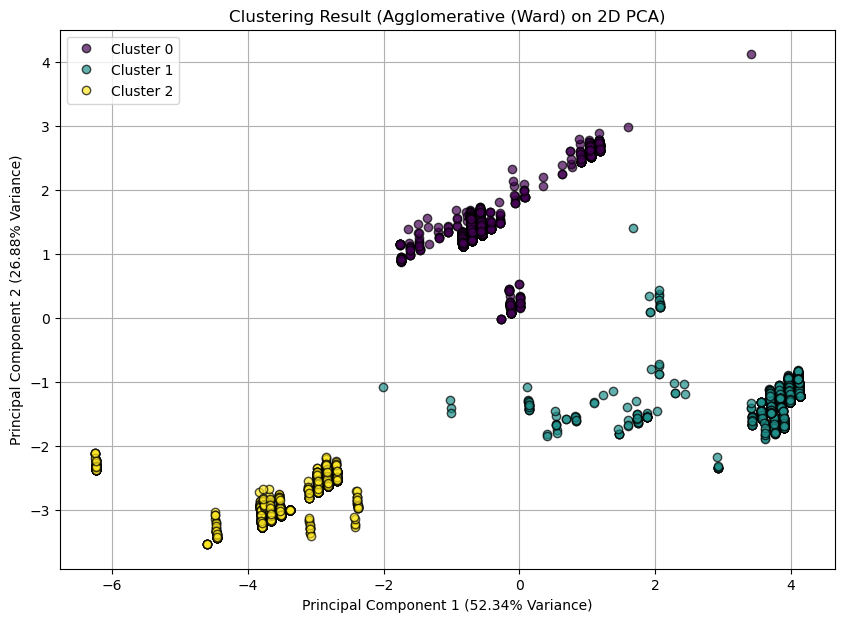


--- Agglomerative (Ward) on 3D PCA Data ---

--- Evaluation for Agglomerative (Ward) on 3D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.7471 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3857 (Lower is better, >= 0)
Calinski-Harabasz Index: 59144.6001 (Higher is better)


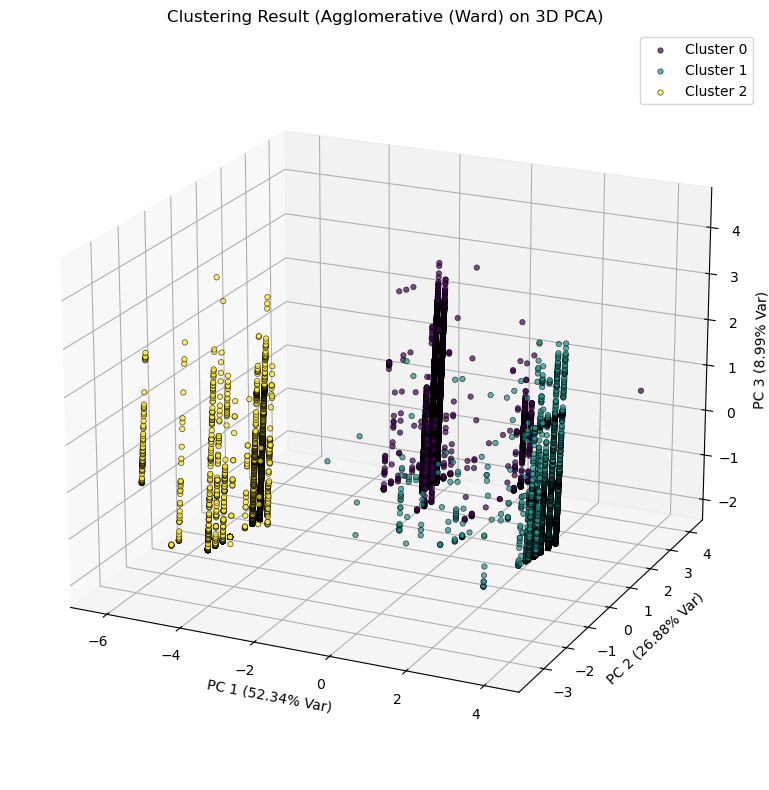

In [21]:
# --- 8.3: Agglomerative Clustering ---
# Let's use the same 'optimal_k' found for K-Means as a starting point.
# We will use 'ward' linkage which often works well.
run_clustering_analysis(
    AgglomerativeClustering,
    "Agglomerative (Ward)",
    df_pca_2d,
    df_pca_3d,
    pca_2d,
    pca_3d,
    n_clusters=optimal_k, # Use k from KMeans analysis
    linkage='ward'
)

4. BIRCH


=============== Analyzing BIRCH ===============

--- BIRCH on 2D PCA Data ---

--- Evaluation for BIRCH on 2D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.9082 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.1456 (Lower is better, >= 0)
Calinski-Harabasz Index: 260742.5679 (Higher is better)


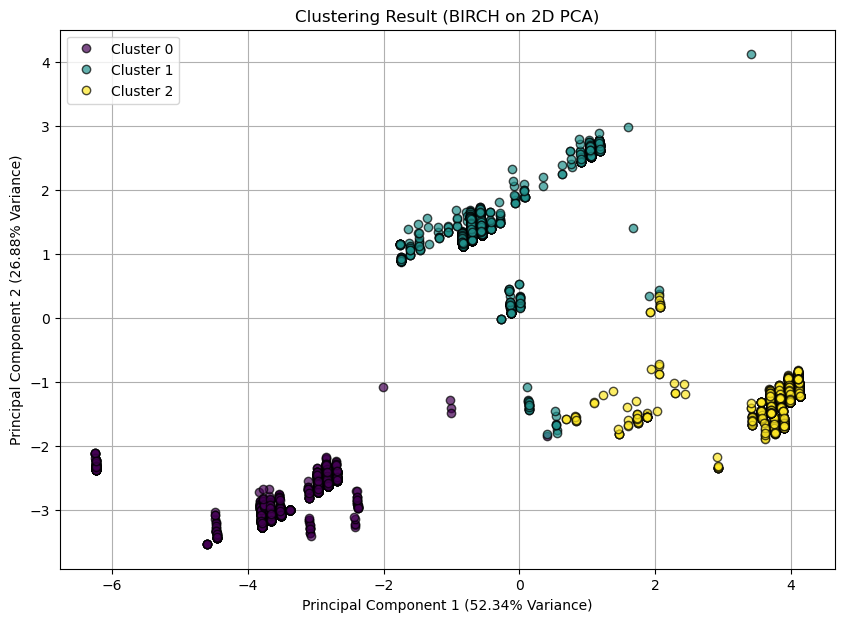


--- BIRCH on 3D PCA Data ---

--- Evaluation for BIRCH on 3D PCA Data ---
Number of clusters found: 3
Silhouette Score: 0.7471 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3857 (Lower is better, >= 0)
Calinski-Harabasz Index: 59141.6592 (Higher is better)


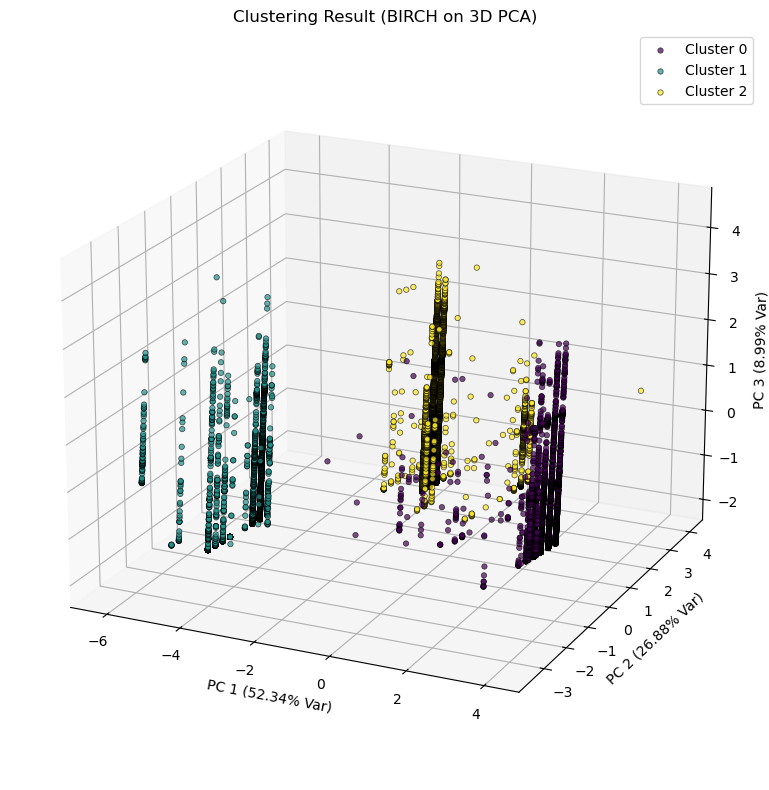

In [22]:
# --- 8.4: BIRCH ---
run_clustering_analysis(
    Birch,
    "BIRCH",
    df_pca_2d,
    df_pca_3d,
    pca_2d,
    pca_3d,
    n_clusters=optimal_k, # Use k from KMeans analysis
    threshold=0.5,       # Default, need tuning in Part B
    branching_factor=50  # Default, need tuning in Part B
)

5. DBSCAN


--- Finding eps for DBSCAN (2D) using k-distance plot ---


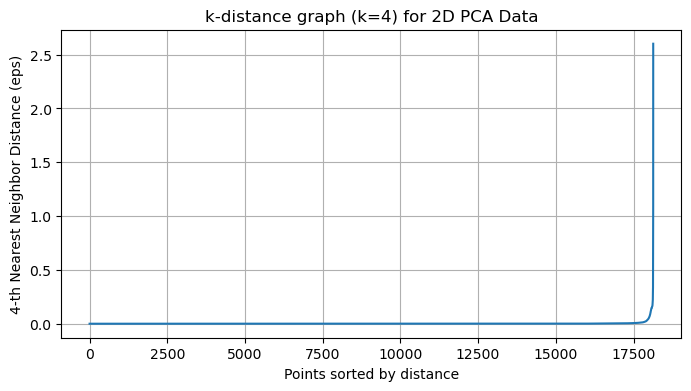


--- Finding eps for DBSCAN (3D) using k-distance plot ---


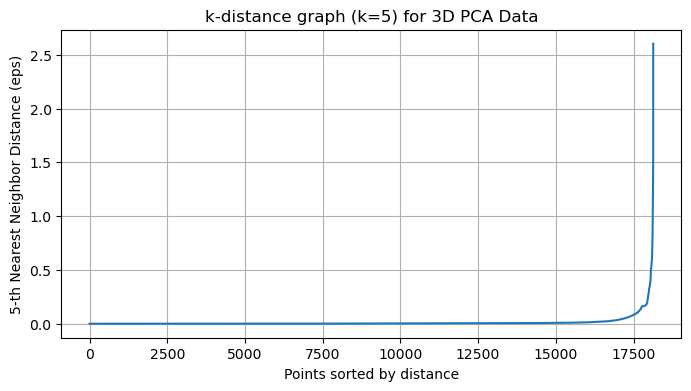

In [23]:
# --- 8.5: DBSCAN ---
# Key parameters: eps (maximum distance between samples for one to be considered as in the neighborhood of the other)
# and min_samples (number of samples in a neighborhood for a point to be considered as a core point).

from sklearn.neighbors import NearestNeighbors

# Choose min_samples. Rule of thumb: D+1 to 2*D, where D is dimensionality.
# For 2D: min_samples = 3 to 5. Let's try 4.
# For 3D: min_samples = 4 to 7. Let's try 5.
min_samples_2d = 4
min_samples_3d = 5

# Calculate distances for 2D
print("\n--- Finding eps for DBSCAN (2D) using k-distance plot ---")
neighbors_2d = NearestNeighbors(n_neighbors=min_samples_2d)
neighbors_fit_2d = neighbors_2d.fit(df_pca_2d)
distances_2d, indices_2d = neighbors_fit_2d.kneighbors(df_pca_2d)
distances_2d = np.sort(distances_2d[:, min_samples_2d-1], axis=0) # Sort dist to (k-1)th neighbor

plt.figure(figsize=(8, 4))
plt.plot(distances_2d)
plt.title(f'k-distance graph (k={min_samples_2d}) for 2D PCA Data')
plt.xlabel("Points sorted by distance")
plt.ylabel(f'{min_samples_2d}-th Nearest Neighbor Distance (eps)')
plt.grid(True)
plt.show()


# Calculate distances for 3D
print("\n--- Finding eps for DBSCAN (3D) using k-distance plot ---")
neighbors_3d = NearestNeighbors(n_neighbors=min_samples_3d)
neighbors_fit_3d = neighbors_3d.fit(df_pca_3d)
distances_3d, indices_3d = neighbors_fit_3d.kneighbors(df_pca_3d)
distances_3d = np.sort(distances_3d[:, min_samples_3d-1], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances_3d)
plt.title(f'k-distance graph (k={min_samples_3d}) for 3D PCA Data')
plt.xlabel("Points sorted by distance")
plt.ylabel(f'{min_samples_3d}-th Nearest Neighbor Distance (eps)')
plt.grid(True)
plt.show()


Eps Decision is based on the clear elbow. from the distance garph, we know that: 

- selected Eps for **2D**: 0.1
- selected Eps for **3D**: 0.2

In [24]:
# 2D plot
eps_2d = 0.1 
print(f"Selected eps = {eps_2d} for 2D data (adjust if needed).")


# 3D plot
eps_3d = 0.2 
print(f"Selected eps = {eps_3d} for 3D data (adjust if needed).")


Selected eps = 0.1 for 2D data (adjust if needed).
Selected eps = 0.2 for 3D data (adjust if needed).



Running DBSCAN with estimated parameters...

=============== Analyzing DBSCAN ===============

--- DBSCAN on 2D PCA Data ---

--- Evaluation for DBSCAN on 2D PCA Data ---
Number of clusters found: 47
Number of noise points: 74 (0.41%)
Silhouette Score: 0.4226 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.5953 (Lower is better, >= 0)
Calinski-Harabasz Index: 321123.4803 (Higher is better)


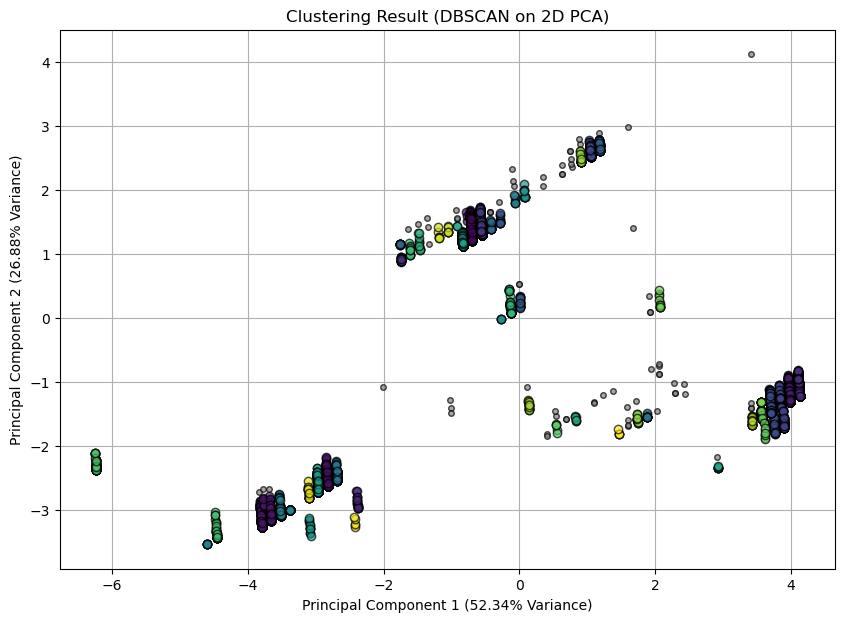


--- DBSCAN on 3D PCA Data ---

--- Evaluation for DBSCAN on 3D PCA Data ---
Number of clusters found: 27
Number of noise points: 165 (0.91%)
Silhouette Score: -0.0227 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.9173 (Lower is better, >= 0)
Calinski-Harabasz Index: 6303.6214 (Higher is better)


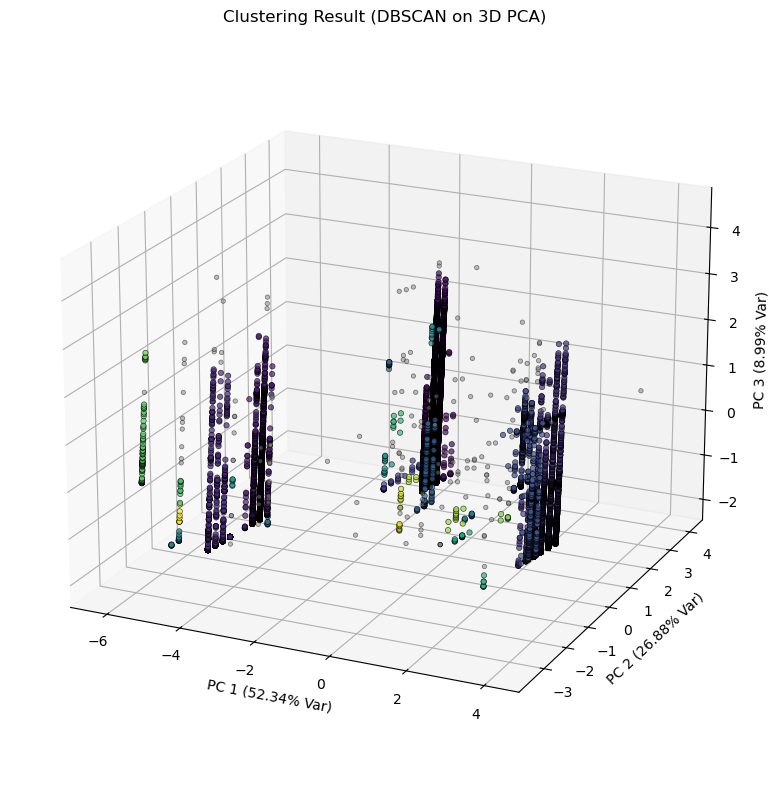

In [25]:
# Run DBSCAN separately for 2D and 3D using their respective parameters
print("\nRunning DBSCAN with estimated parameters...")
print(f"\n{'='*15} Analyzing DBSCAN {'='*15}")
# 2D
print("\n--- DBSCAN on 2D PCA Data ---")
try:
    dbscan_2d = DBSCAN(eps=eps_2d, min_samples=min_samples_2d)
    labels_dbscan_2d = dbscan_2d.fit_predict(df_pca_2d)
    results_db_2d = evaluate_clustering(df_pca_2d, labels_dbscan_2d, "DBSCAN", '2D PCA')
    if results_db_2d: all_results.append(results_db_2d)
    plot_clusters_2d(df_pca_2d, labels_dbscan_2d, pca_2d, "DBSCAN")
except Exception as e:
    print(f"Error running DBSCAN on 2D data: {e}")

# 3D
print("\n--- DBSCAN on 3D PCA Data ---")
try:
    dbscan_3d = DBSCAN(eps=eps_3d, min_samples=min_samples_3d)
    labels_dbscan_3d = dbscan_3d.fit_predict(df_pca_3d)
    results_db_3d = evaluate_clustering(df_pca_3d, labels_dbscan_3d, "DBSCAN", '3D PCA')
    if results_db_3d: all_results.append(results_db_3d)
    plot_clusters_3d(df_pca_3d, labels_dbscan_3d, pca_3d, "DBSCAN")
except Exception as e:
    print(f"Error running DBSCAN on 3D data: {e}")

6. Gaussian Mixture Model


--- Determining Optimal Components for GMM using BIC/AIC ---


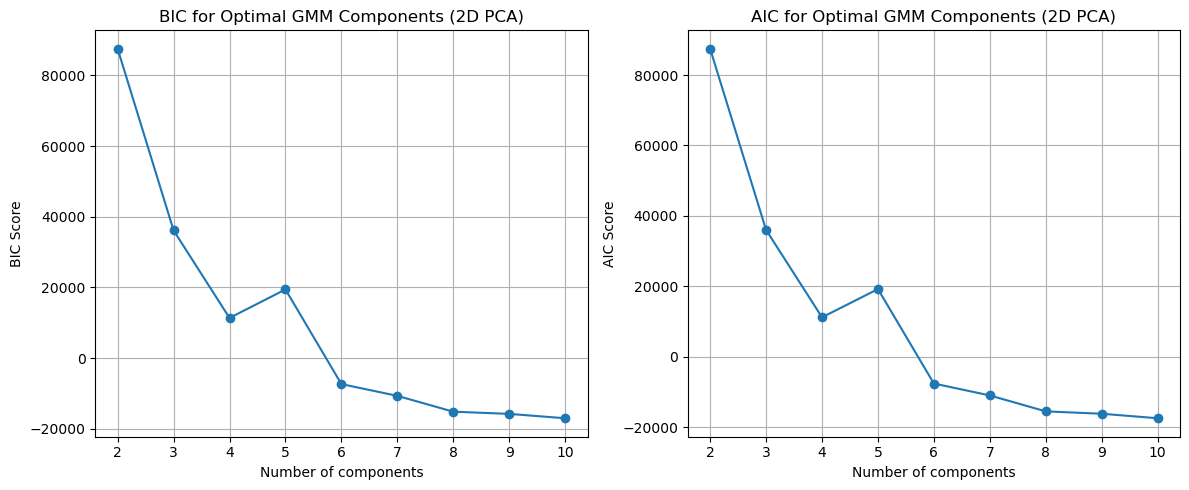

In [26]:
# --- 8.6: Gaussian Mixture Model (GMM) ---
# Probabilistic model. Need to specify n_components (number of clusters).
# we use BIC/AIC to help choose, similar to Elbow method for K-Means.
print("\n--- Determining Optimal Components for GMM using BIC/AIC ---")
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

# Check on 2D data
for n in n_components_range:
    gmm_test = GaussianMixture(n_components=n, random_state=42, n_init=5) # Add n_init
    gmm_test.fit(df_pca_2d)
    bic_scores.append(gmm_test.bic(df_pca_2d))
    aic_scores.append(gmm_test.aic(df_pca_2d))

# Plot BIC/AIC Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.title('BIC for Optimal GMM Components (2D PCA)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('AIC Score')
plt.title('AIC for Optimal GMM Components (2D PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()


Decision on optimal n_components based on which number of components minimizes BIC and AIC.

n_components of 4 is chosen since 6 onwards falls on negative values of BIC and AIC score

In [27]:
optimal_n_components = 4 
print(f"\nSelected optimal n_components = {optimal_n_components} for GMM (adjust if needed).")



Selected optimal n_components = 4 for GMM (adjust if needed).



Running GMM with selected components...

=============== Analyzing GMM ===============

--- GMM on 2D PCA Data ---

--- Evaluation for GMM on 2D PCA Data ---
Number of clusters found: 4
Silhouette Score: 0.8744 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.1743 (Lower is better, >= 0)
Calinski-Harabasz Index: 112222.8380 (Higher is better)


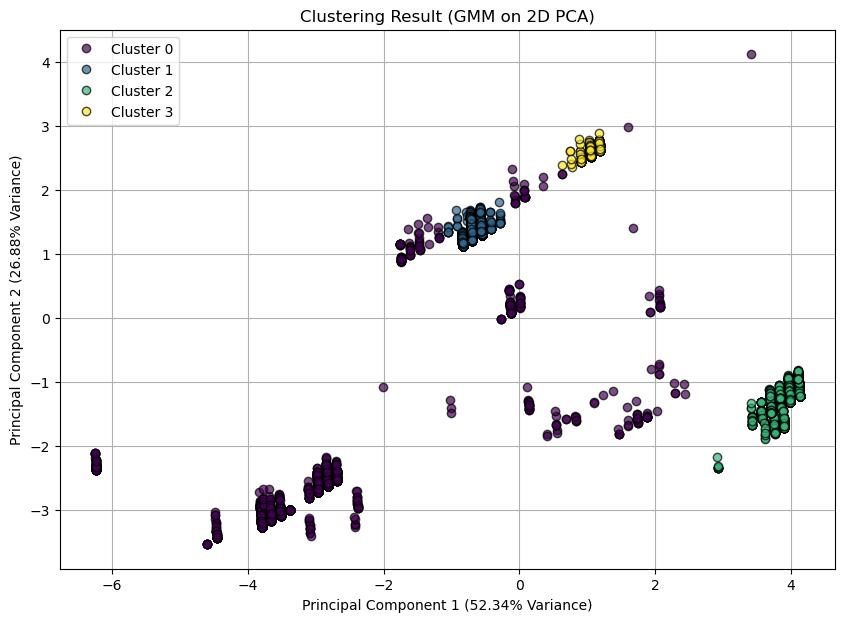


--- GMM on 3D PCA Data ---

--- Evaluation for GMM on 3D PCA Data ---
Number of clusters found: 4
Silhouette Score: 0.6412 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 3.1491 (Lower is better, >= 0)
Calinski-Harabasz Index: 30154.9448 (Higher is better)


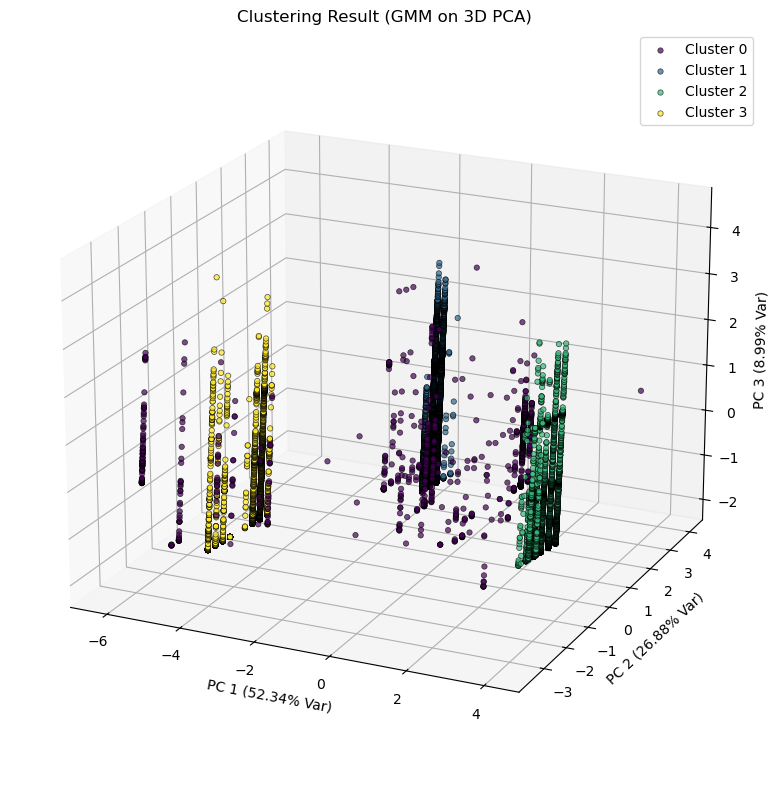

In [28]:
# Run GMM with the chosen number of components
# GMM doesn't have fit_predict directly, need fit then predict
print("\nRunning GMM with selected components...")
print(f"\n{'='*15} Analyzing GMM {'='*15}")
# 2D
print("\n--- GMM on 2D PCA Data ---")
try:
    gmm_2d = GaussianMixture(n_components=optimal_n_components, random_state=42, n_init=5)
    gmm_2d.fit(df_pca_2d)
    labels_gmm_2d = gmm_2d.predict(df_pca_2d)
    results_gmm_2d = evaluate_clustering(df_pca_2d, labels_gmm_2d, "GMM", '2D PCA')
    if results_gmm_2d: all_results.append(results_gmm_2d)
    plot_clusters_2d(df_pca_2d, labels_gmm_2d, pca_2d, "GMM")
except Exception as e:
    print(f"Error running GMM on 2D data: {e}")

# 3D
print("\n--- GMM on 3D PCA Data ---")
try:
    gmm_3d = GaussianMixture(n_components=optimal_n_components, random_state=42, n_init=5)
    gmm_3d.fit(df_pca_3d)
    labels_gmm_3d = gmm_3d.predict(df_pca_3d)
    results_gmm_3d = evaluate_clustering(df_pca_3d, labels_gmm_3d, "GMM", '3D PCA')
    if results_gmm_3d: all_results.append(results_gmm_3d)
    plot_clusters_3d(df_pca_3d, labels_gmm_3d, pca_3d, "GMM")
except Exception as e:
    print(f"Error running GMM on 3D data: {e}")

7. HDBSCAN


=============== Analyzing HDBSCAN ===============

--- HDBSCAN on 2D PCA Data ---


c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Evaluation for HDBSCAN on 2D PCA Data ---
Number of clusters found: 1115
Number of noise points: 3194 (17.61%)
Silhouette Score: 0.6748 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3512 (Lower is better, >= 0)
Calinski-Harabasz Index: 611143.4312 (Higher is better)


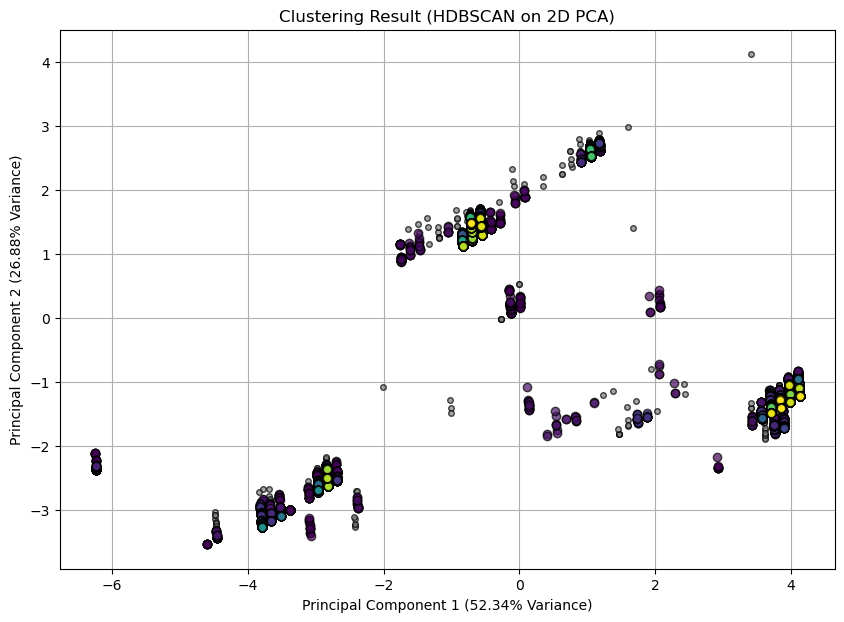


--- HDBSCAN on 3D PCA Data ---


c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Evaluation for HDBSCAN on 3D PCA Data ---
Number of clusters found: 1107
Number of noise points: 3335 (18.39%)
Silhouette Score: 0.6608 (Higher is better, range [-1, 1])
Davies-Bouldin Index: 0.3656 (Lower is better, >= 0)
Calinski-Harabasz Index: 81508.0046 (Higher is better)


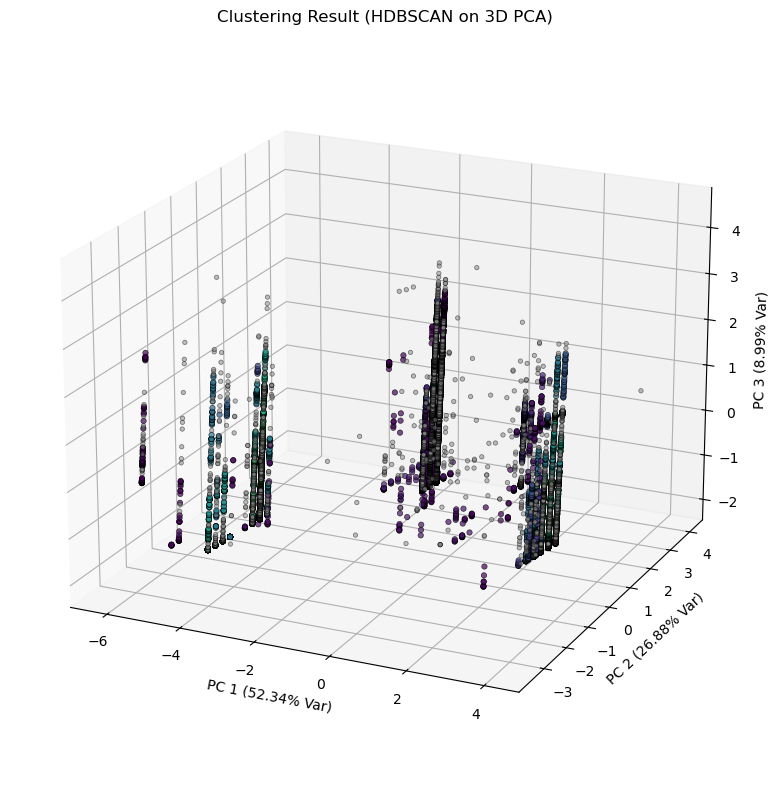

In [29]:
# --- 8.7: HDBSCAN ---
# Key parameters: min_cluster_size, min_samples.
# min_samples helps determine core points (similar to DBSCAN's meaning but different algorithm).
# min_cluster_size filters out smaller clusters.
if 'hdbscan' in globals(): # Check if import succeeded
    run_clustering_analysis(
        hdbscan.HDBSCAN,
        "HDBSCAN",
        df_pca_2d,
        df_pca_3d,
        pca_2d,
        pca_3d,
        min_cluster_size=5,   # Default, adjust based on expected cluster sizes
        min_samples=None,      # Let HDBSCAN estimate this (often defaults to min_cluster_size)
        gen_min_span_tree=True # Sometimes useful for visualization/understanding, adds overhead
    )
else:
    print("\nSkipping HDBSCAN as the library was not found.")


## Comparing Result

In [30]:
# --- Step 9: Consolidate and Compare Results ---
print("\n--- Step 9: Consolidating and Comparing Model Performance ---")

if not all_results:
    print("No clustering results were successfully generated.")
else:
    results_df = pd.DataFrame(all_results)
    
    print("\nComparison Table of Clustering Metrics:")
    # Sort by a primary metric (e.g., Silhouette score descending) and dimensionality
    results_df_sorted = results_df.sort_values(by=['Dimensionality', 'Silhouette'], ascending=[True, False])

    # Display the results
    # Use display() if in a Jupyter environment for better formatting
    try:
        display(results_df_sorted)
    except NameError: # display is not defined (e.g., running as plain script)
        print(results_df_sorted.to_string()) # Print full dataframe



--- Step 9: Consolidating and Comparing Model Performance ---

Comparison Table of Clustering Metrics:


,Algorithm,Dimensionality,Num_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,K-Means,2D PCA,3,0.908286,0.145518,261069.125092
6,BIRCH,2D PCA,3,0.908228,0.145627,260742.567901
4,Agglomerative (Ward),2D PCA,3,0.907417,0.145842,251060.592845
2,Mean Shift,2D PCA,7,0.887438,0.392396,280513.480056
10,GMM,2D PCA,4,0.874386,0.174323,112222.837963
12,HDBSCAN,2D PCA,1115,0.674838,0.351213,611143.431182
8,DBSCAN,2D PCA,47,0.422602,0.595251,321123.480348
1,K-Means,3D PCA,3,0.747858,0.385450,59743.407040
5,Agglomerative (Ward),3D PCA,3,0.747141,0.385725,59144.600106
7,BIRCH,3D PCA,3,0.747116,0.385720,59141.659188


Saving the result 

In [31]:
import pandas as pd
import numpy as np
import joblib # For saving sklearn objects like PCA
import os

# Create a directory to store Part B inputs if it doesn't exist
output_dir_part_b = 'part_b_inputs'
os.makedirs(output_dir_part_b, exist_ok=True)
print(f"Saving necessary files for Part B into: '{output_dir_part_b}/'")

Saving necessary files for Part B into: 'part_b_inputs/'


In [32]:
# Assuming df_pca_2d and df_pca_3d are NumPy arrays from PCA
pca_2d_df = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])
pca_3d_df = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])

pca_2d_filepath = os.path.join(output_dir_part_b, 'pca_2d_data.csv')
pca_3d_filepath = os.path.join(output_dir_part_b, 'pca_3d_data.csv')

pca_2d_df.to_csv(pca_2d_filepath, index=False)
pca_3d_df.to_csv(pca_3d_filepath, index=False)
print(f"Saved: {pca_2d_filepath}")
print(f"Saved: {pca_3d_filepath}")

Saved: part_b_inputs\pca_2d_data.csv
Saved: part_b_inputs\pca_3d_data.csv


In [33]:
pca_2d_obj_filepath = os.path.join(output_dir_part_b, 'pca_2d_object.joblib')
pca_3d_obj_filepath = os.path.join(output_dir_part_b, 'pca_3d_object.joblib')

# Assuming pca_2d and pca_3d are your fitted PCA objects from Part A
joblib.dump(pca_2d, pca_2d_obj_filepath)
joblib.dump(pca_3d, pca_3d_obj_filepath)
print(f"Saved: {pca_2d_obj_filepath}")
print(f"Saved: {pca_3d_obj_filepath}")

Saved: part_b_inputs\pca_2d_object.joblib
Saved: part_b_inputs\pca_3d_object.joblib


In [34]:
part_a_results_filepath = os.path.join(output_dir_part_b, 'part_a_results_summary.csv')

# Assuming results_df_sorted is your final DataFrame from Part A analysis
if 'results_df_sorted' in locals(): # Check if the dataframe exists
     results_df_sorted.to_csv(part_a_results_filepath, index=False)
     print(f"Saved: {part_a_results_filepath}")
else:
     print("Warning: 'results_df_sorted' DataFrame not found. Skipping saving Part A summary.")

Saved: part_b_inputs\part_a_results_summary.csv


In [35]:
# --- Step: Save Initial Parameters from Part A ---
import os
import joblib
import numpy as np 
import pprint

print("\n--- Saving Initial Parameters from Part A ---")

# --- Define the key parameters determined in Part A ---

# Value explicitly set in the K-Means section and used for others
optimal_k = 3

# Value for MeanShift - requires the *output* of estimate_bandwidth from your run
# Replace the string placeholder below with the actual number
bandwidth_2d = 0.45 

# Values explicitly set in the DBSCAN section
eps_2d = 0.1
min_samples_2d = 4

# Using 4 as a likely intended value or placeholder based on template.
optimal_n_components = 4 

# --- Create the dictionary ---
# Using the _2D convention for consistency
part_a_initial_params = {
    'KMeans_2D': {
        'n_clusters': optimal_k, # From K-Means analysis section
        'random_state': 42,
        'n_init': 10             # Value used in K-Means call
        },
    'MeanShift_2D': {
        'bandwidth': bandwidth_2d, 
        'bin_seeding': True        # Value used in MeanShift call
        },
    'Agglomerative_2D': {
        'n_clusters': optimal_k,   # Used optimal_k from K-Means
        'linkage': 'ward',         # Value used in Agglomerative call
        # 'metric': 'euclidean'    # Implied default for 'ward'
        },
    'BIRCH_2D': {
        'n_clusters': optimal_k,   # Used optimal_k from K-Means
        'threshold': 0.5,          # Value used in BIRCH call
        'branching_factor': 50     # Value used in BIRCH call
        },
    'DBSCAN_2D': {
        'eps': eps_2d,             # Value set before DBSCAN call
        'min_samples': min_samples_2d # Value set before DBSCAN call
        },
    'GMM_2D': {
        'n_components': optimal_n_components, # <-- VERIFY/REPLACE THIS VALUE
        'random_state': 42,
        'n_init': 5                # Value used in GMM call
        }
}

# --- Define output directory and save ---
output_dir_part_b = 'part_b_inputs' 
os.makedirs(output_dir_part_b, exist_ok=True) 

part_a_params_filepath = os.path.join(output_dir_part_b, 'part_a_initial_params.joblib')
joblib.dump(part_a_initial_params, part_a_params_filepath)

print(f"\nSaved Part A initial parameters to: {part_a_params_filepath}")
print("\nDictionary content saved:")
pprint.pprint(part_a_initial_params)


--- Saving Initial Parameters from Part A ---

Saved Part A initial parameters to: part_b_inputs\part_a_initial_params.joblib

Dictionary content saved:
{'Agglomerative_2D': {'linkage': 'ward', 'n_clusters': 3},
 'BIRCH_2D': {'branching_factor': 50, 'n_clusters': 3, 'threshold': 0.5},
 'DBSCAN_2D': {'eps': 0.1, 'min_samples': 4},
 'GMM_2D': {'n_components': 4, 'n_init': 5, 'random_state': 42},
 'KMeans_2D': {'n_clusters': 3, 'n_init': 10, 'random_state': 42},
 'MeanShift_2D': {'bandwidth': 0.45, 'bin_seeding': True}}
